# Connecting to an API/Pulling in the Data and Cleaning/Formatting

## Perform at least 5 data transformation and/or cleansing steps to your API data. For example:

### Replace Headers
### Format data into a more readable format
### Identify outliers and bad data
### Find duplicates
### Fix casing or inconsistent values
### Conduct Fuzzy Matching

## Import Libraries

In [1]:
import urllib.request, urllib.parse
from urllib.error import HTTPError,URLError
import pandas as pd
import json 

## Import API Data

In [2]:
! pip install MLB-StatsAPI 
# install API wrapper of https://appac.github.io/mlb-data-api-docs/


# https://betterprogramming.pub/using-the-mlb-stats-api-to-get-daily-data-88f48266656c
# https://github.com/toddrob99/MLB-StatsAPI/wiki/All-Functions#core-functions

In [3]:
import statsapi # import the stats api library

In [48]:
def get_division_standings(league, division): # created function to call the API and return a pandas dataframe of the MLB division standings
    standings = pd.DataFrame(statsapi.standings_data(league)[division]['teams'])
    standings = standings[['name', 'div_rank', 'gb', 'w', 'l', 'elim_num', 'wc_rank', 'wc_gb', 'wc_elim_num']]
    return standings

In [49]:
AML_WEST_DF = get_division_standings(103, 200) # division standings of MLB American West Division

# Add column for League and Division
AML_WEST_DF['Division']='AW'
AML_WEST_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num,Division
0,Houston Astros,1,-,95,67,-,-,-,-,AW
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E,AW
2,Oakland Athletics,3,9.0,86,76,E,5,6.0,E,AW
3,Los Angeles Angels,4,18.0,77,85,E,8,15.0,E,AW
4,Texas Rangers,5,35.0,60,102,E,11,32.0,E,AW


In [50]:
AML_EAST_DF = get_division_standings(103, 201) # division standings of MLB American East Division
AML_EAST_DF

# Add column for League and Division
AML_EAST_DF['Division']='AE'
AML_EAST_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num,Division
0,Tampa Bay Rays,1,-,100,62,-,-,-,-,AE
1,Boston Red Sox,2,8.0,92,70,E,1,-,-,AE
2,New York Yankees,3,8.0,92,70,E,2,-,-,AE
3,Toronto Blue Jays,4,9.0,91,71,E,3,1.0,E,AE
4,Baltimore Orioles,5,48.0,52,110,E,12,40.0,E,AE


In [51]:
AML_CENTRAL_DF = get_division_standings(103, 202) # division standings of MLB American Central Division
AML_CENTRAL_DF

# Add column for League and Division
AML_CENTRAL_DF['Division']='AC'
AML_CENTRAL_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num,Division
0,Chicago White Sox,1,-,93,69,-,-,-,-,AC
1,Cleveland Indians,2,13.0,80,82,E,6,12.0,E,AC
2,Detroit Tigers,3,16.0,77,85,E,7,15.0,E,AC
3,Kansas City Royals,4,19.0,74,88,E,9,18.0,E,AC
4,Minnesota Twins,5,20.0,73,89,E,10,19.0,E,AC


In [52]:
NL_WEST_DF = get_division_standings(104, 203) # division standings of MLB National West Division
NL_WEST_DF

# Add column for League and Division
NL_WEST_DF['Division']='NW'
NL_WEST_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num,Division
0,San Francisco Giants,1,-,107,55,-,-,-,-,NW
1,Los Angeles Dodgers,2,1.0,106,56,E,1,+16.0,-,NW
2,San Diego Padres,3,28.0,79,83,E,5,11.0,E,NW
3,Colorado Rockies,4,32.5,74,87,E,7,15.5,E,NW
4,Arizona Diamondbacks,5,55.0,52,110,E,12,38.0,E,NW


In [53]:
NL_EAST_DF = get_division_standings(104, 204) # division standings of MLB National East Division
NL_EAST_DF

# Add column for League and Division
NL_EAST_DF['Division']='NE'
NL_EAST_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num,Division
0,Atlanta Braves,1,-,88,73,-,-,-,-,NE
1,Philadelphia Phillies,2,6.5,82,80,E,4,8.0,E,NE
2,New York Mets,3,11.5,77,85,E,6,13.0,E,NE
3,Miami Marlins,4,21.5,67,95,E,9,23.0,E,NE
4,Washington Nationals,5,23.5,65,97,E,10,25.0,E,NE


In [54]:
NL_CENTRAL_DF = get_division_standings(104, 205) # division standings of MLB National Central Division
NL_CENTRAL_DF

# Add column for League and Division
NL_CENTRAL_DF['Division']='NC'
NL_CENTRAL_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num,Division
0,Milwaukee Brewers,1,-,95,67,-,-,-,-,NC
1,St. Louis Cardinals,2,5.0,90,72,E,2,-,-,NC
2,Cincinnati Reds,3,12.0,83,79,E,3,7.0,E,NC
3,Chicago Cubs,4,24.0,71,91,E,8,19.0,E,NC
4,Pittsburgh Pirates,5,34.0,61,101,E,11,29.0,E,NC


In [74]:
# Combine the dataframes into 1 larger dataframe
# https://datacarpentry.org/python-socialsci/11-joins/index.html
ALL_DIVS_DF = pd.concat([AML_WEST_DF, AML_EAST_DF, AML_CENTRAL_DF, NL_WEST_DF, NL_EAST_DF, NL_CENTRAL_DF])
ALL_DIVS_DF

,name,div_rank,gb,w,l,elim_num,wc_rank,wc_gb,wc_elim_num,Division
0,Houston Astros,1,-,95,67,-,-,-,-,AW
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E,AW
2,Oakland Athletics,3,9.0,86,76,E,5,6.0,E,AW
3,Los Angeles Angels,4,18.0,77,85,E,8,15.0,E,AW
4,Texas Rangers,5,35.0,60,102,E,11,32.0,E,AW
0,Tampa Bay Rays,1,-,100,62,-,-,-,-,AE
1,Boston Red Sox,2,8.0,92,70,E,1,-,-,AE
2,New York Yankees,3,8.0,92,70,E,2,-,-,AE
3,Toronto Blue Jays,4,9.0,91,71,E,3,1.0,E,AE
4,Baltimore Orioles,5,48.0,52,110,E,12,40.0,E,AE


## Replace Headers

In [75]:
# Replace headers with names that are more intuitive
ALL_DIVS_DF = ALL_DIVS_DF.rename(columns={'name':'Team Name', 'div_rank': 'Division Rank', 'gb': 'Games Behind', 'w': 'Wins', 'l': 'Losses','elim_num': 'Elimination Number', 'wc_rank': 'Wild Card Rank', 'wc_gb': 'Wild Card Games Behind', 'wc_elim_num': 'Wild Card Elimination Number', })
ALL_DIVS_DF.head()

# elim_num: This is the minimum number of games that a team must win in order to remain in contention for first place 
# in its division. Teams that are already eliminated from first place contention are labeled "Elim" in this box.

,Team Name,Division Rank,Games Behind,Wins,Losses,Elimination Number,Wild Card Rank,Wild Card Games Behind,Wild Card Elimination Number,Division
0,Houston Astros,1,-,95,67,-,-,-,-,AW
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E,AW
2,Oakland Athletics,3,9.0,86,76,E,5,6.0,E,AW
3,Los Angeles Angels,4,18.0,77,85,E,8,15.0,E,AW
4,Texas Rangers,5,35.0,60,102,E,11,32.0,E,AW


## Format data into a more readable format

In [76]:
# Sort dataframe by Division Rank and Losses
ALL_DIVS_DF = ALL_DIVS_DF.sort_values(by=['Division Rank', 'Losses'])
print(ALL_DIVS_DF)

               Team Name Division Rank Games Behind  Wins  Losses  \
0   San Francisco Giants             1            -   107      55   
0         Tampa Bay Rays             1            -   100      62   
0         Houston Astros             1            -    95      67   
0      Milwaukee Brewers             1            -    95      67   
0      Chicago White Sox             1            -    93      69   
0         Atlanta Braves             1            -    88      73   
1    Los Angeles Dodgers             2          1.0   106      56   
1         Boston Red Sox             2          8.0    92      70   
1       Seattle Mariners             2          5.0    90      72   
1    St. Louis Cardinals             2          5.0    90      72   
1  Philadelphia Phillies             2          6.5    82      80   
1      Cleveland Indians             2         13.0    80      82   
2       New York Yankees             3          8.0    92      70   
2      Oakland Athletics          

## Fix casing or inconsistent values

In [79]:
# Replace - table values with 0
ALL_DIVS_DF = ALL_DIVS_DF.replace(['-'],'0')
ALL_DIVS_DF

,Team Name,Division Rank,Games Behind,Wins,Losses,Elimination Number,Wild Card Rank,Wild Card Games Behind,Wild Card Elimination Number,Division
0,San Francisco Giants,1,0,107,55,0,0,0,0,NW
0,Tampa Bay Rays,1,0,100,62,0,0,0,0,AE
0,Houston Astros,1,0,95,67,0,0,0,0,AW
0,Milwaukee Brewers,1,0,95,67,0,0,0,0,NC
0,Chicago White Sox,1,0,93,69,0,0,0,0,AC
0,Atlanta Braves,1,0,88,73,0,0,0,0,NE
1,Los Angeles Dodgers,2,1.0,106,56,E,1,+16.0,0,NW
1,Boston Red Sox,2,8.0,92,70,E,1,0,0,AE
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E,AW
1,St. Louis Cardinals,2,5.0,90,72,E,2,0,0,NC


In [80]:
# Remove + symbol on +16 in Los Angeles Dodgers row
# Change column "Wild Card Games Behind" into an integer
ALL_DIVS_DF['Wild Card Games Behind'] = pd.to_numeric(ALL_DIVS_DF['Wild Card Games Behind'])
ALL_DIVS_DF['Wild Card Games Behind']

0     0.0
0     0.0
0     0.0
0     0.0
0     0.0
0     0.0
1    16.0
1     0.0
1     2.0
1     0.0
1     8.0
1    12.0
2     0.0
2     6.0
2     7.0
2    11.0
2    15.0
2    13.0
3     1.0
3    15.0
3    15.5
3    18.0
3    19.0
3    23.0
4    19.0
4    25.0
4    29.0
4    32.0
4    40.0
4    38.0
Name: Wild Card Games Behind, dtype: float64

In [82]:
ALL_DIVS_DF

,Team Name,Division Rank,Games Behind,Wins,Losses,Elimination Number,Wild Card Rank,Wild Card Games Behind,Wild Card Elimination Number,Division
0,San Francisco Giants,1,0,107,55,0,0,0.0,0,NW
0,Tampa Bay Rays,1,0,100,62,0,0,0.0,0,AE
0,Houston Astros,1,0,95,67,0,0,0.0,0,AW
0,Milwaukee Brewers,1,0,95,67,0,0,0.0,0,NC
0,Chicago White Sox,1,0,93,69,0,0,0.0,0,AC
0,Atlanta Braves,1,0,88,73,0,0,0.0,0,NE
1,Los Angeles Dodgers,2,1.0,106,56,E,1,16.0,0,NW
1,Boston Red Sox,2,8.0,92,70,E,1,0.0,0,AE
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E,AW
1,St. Louis Cardinals,2,5.0,90,72,E,2,0.0,0,NC


## Identify outliers and bad data

<AxesSubplot:xlabel='Team Name', ylabel='Wins'>

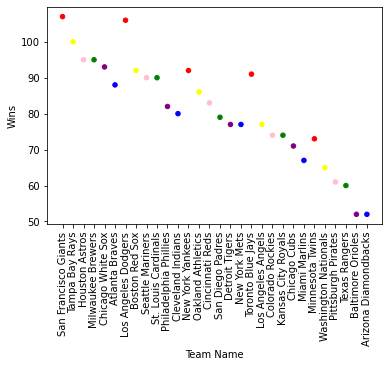

In [99]:
# Identify outliers and bad data visually using a scatterplot: Each team wins by Division
ALL_DIVS_DF.plot(kind='scatter', x='Team Name', y='Wins', alpha=1, color=('red','yellow','pink','green','purple','blue','red','yellow','pink','green','purple','blue','red','yellow','pink','green','purple','blue','red','yellow','pink','green','purple','blue','red','yellow','pink','green','purple','blue'), rot=90)
# The outliers in this dataset for Wins are the San Francisco Giants, Los Angeles Dodgers, and Toronto Blue Jays. 
# Interestingly, none of these outliers won the 2021 World Series (which was the Atlanta Braves)

In [101]:
# Display wins divided by division ranking
# Change columns to numeric
ALL_DIVS_DF['Wins'] = pd.to_numeric(ALL_DIVS_DF['Wins'])
ALL_DIVS_DF['Wins']
ALL_DIVS_DF['Division Rank'] = pd.to_numeric(ALL_DIVS_DF['Division Rank'])
ALL_DIVS_DF['Division Rank']

# Add new column
ALL_DIVS_DF['Ranked Wins']=ALL_DIVS_DF['Wins']/ALL_DIVS_DF['Division Rank']
ALL_DIVS_DF

,Team Name,Division Rank,Games Behind,Wins,Losses,Elimination Number,Wild Card Rank,Wild Card Games Behind,Wild Card Elimination Number,Division,Ranked Wins
0,San Francisco Giants,1,0,107,55,0,0,0.0,0,NW,107.000000
0,Tampa Bay Rays,1,0,100,62,0,0,0.0,0,AE,100.000000
0,Houston Astros,1,0,95,67,0,0,0.0,0,AW,95.000000
0,Milwaukee Brewers,1,0,95,67,0,0,0.0,0,NC,95.000000
0,Chicago White Sox,1,0,93,69,0,0,0.0,0,AC,93.000000
0,Atlanta Braves,1,0,88,73,0,0,0.0,0,NE,88.000000
1,Los Angeles Dodgers,2,1.0,106,56,E,1,16.0,0,NW,53.000000
1,Boston Red Sox,2,8.0,92,70,E,1,0.0,0,AE,46.000000
1,Seattle Mariners,2,5.0,90,72,E,4,2.0,E,AW,45.000000
1,St. Louis Cardinals,2,5.0,90,72,E,2,0.0,0,NC,45.000000


In [121]:
# Group teams by Division and find the mean for each division
ALL_DIVS_DF_mean = ALL_DIVS_DF.groupby(["Division"]).mean()
ALL_DIVS_DF_mean.reset_index(drop=False, inplace=True)
ALL_DIVS_DF_mean

,Division,Division Rank,Wins,Losses,Wild Card Games Behind,Ranked Wins
0,AC,3.0,79.4,82.6,12.8,38.353333
1,AE,3.0,85.4,76.6,8.2,41.963333
2,AW,3.0,81.6,80.4,11.0,39.983333
3,NC,3.0,80.0,82.0,11.0,39.523333
4,NE,3.0,75.8,86.0,13.8,36.883333
5,NW,3.0,83.6,78.2,16.1,43.046667


<AxesSubplot:xlabel='Division'>

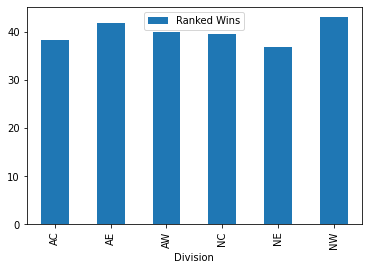

In [122]:
# Visualize the Ranked Wins
ALL_DIVS_DF_mean.plot.bar(x='Division', y='Ranked Wins', rot=90)
# This bar chart shows outliers in terms of strongest and weakest divisions. The strongest division was National West (NW), 
# the weakest division was National East (NE)

## Find duplicates

In [115]:
ALL_DIVS_DF[ALL_DIVS_DF.duplicated(keep=False)]
# There are no duplicates in the dataset

,Team Name,Division Rank,Games Behind,Wins,Losses,Elimination Number,Wild Card Rank,Wild Card Games Behind,Wild Card Elimination Number,Division,Ranked Wins


## Conduct Fuzzy Matching